In [1]:
import torch
import numpy as np

torch.set_printoptions(edgeitems=2, threshold=50)

# 1

In [2]:
img_path = "../../myData/p1ch4/exercise-img/"

In [4]:
import imageio.v3 as iio
import os

In [5]:
files = os.listdir(img_path)
files

['dragon.jpg', 'red-dead-2.png', 'sky.jpg']

In [6]:
imgs = []
for f in files:
    img_arr = iio.imread(img_path + f)
    imgs.append(img_arr)

In [10]:
imgs[0], imgs[0].shape

(array([[[216, 253, 175],
         [215, 252, 174],
         [217, 252, 172],
         ...,
         [ 11,  80,  33],
         [ 11,  80,  33],
         [ 11,  80,  33]],
 
        [[215, 252, 172],
         [215, 252, 172],
         [216, 251, 169],
         ...,
         [ 11,  80,  33],
         [ 11,  80,  33],
         [ 11,  80,  33]],
 
        [[215, 253, 168],
         [215, 253, 168],
         [216, 251, 167],
         ...,
         [ 11,  80,  33],
         [ 11,  80,  33],
         [ 11,  80,  33]],
 
        ...,
 
        [[109, 177,  12],
         [109, 177,  12],
         [109, 177,  12],
         ...,
         [ 71, 137,  11],
         [ 73, 138,  12],
         [ 73, 138,  12]],
 
        [[109, 177,  12],
         [109, 177,  12],
         [109, 177,  12],
         ...,
         [ 74, 140,  14],
         [ 80, 145,  19],
         [ 83, 148,  22]],
 
        [[109, 177,  12],
         [109, 177,  12],
         [109, 177,  12],
         ...,
         [ 75, 141,  15],
  

In [11]:
img_g = torch.from_numpy(imgs[0])
img_r = torch.from_numpy(imgs[1])
img_b = torch.from_numpy(imgs[2])
img_g.shape, img_r.shape, img_b.shape

(torch.Size([1080, 1920, 3]),
 torch.Size([1080, 1920, 4]),
 torch.Size([1080, 1920, 3]))

In [13]:
alpha = img_r[:, :, -1]

In [14]:
torch.unique(alpha)

tensor([255], dtype=torch.uint8)

In [15]:
img_r = img_r[:, :, :-1]
img_r.shape

torch.Size([1080, 1920, 3])

In [19]:
img_r.dtype

torch.uint8

In [35]:
img_r = img_r.to(torch.float32)
img_g = img_g.to(torch.float32)
img_b = img_b.to(torch.float32)

In [38]:
img_r = img_r.permute(2, 0, 1)
img_g = img_g.permute(2, 0, 1)
img_b = img_b.permute(2, 0, 1)

In [21]:
imgs = [img_r, img_g, img_b]
means = []
rgb_means = []
for img in imgs:
    img = img.to(torch.float)
    img = img.permute(2, 0, 1)
    img_mean = img.mean()
    rgb_mean = img.mean(dim=1).mean(dim=1)
    means.append(img_mean)
    rgb_means.append(rgb_mean)
means, rgb_means

([tensor(79.1599), tensor(122.9984), tensor(161.3301)],
 [tensor([172.3891,  31.5377,  33.5530]),
  tensor([136.9143, 171.9816,  60.0992]),
  tensor([ 82.0433, 172.2795, 229.6675])])

In [39]:
img_r.shape

torch.Size([3, 1080, 1920])

In [40]:
rr_mean = img_r[0].mean()
rr_mean

tensor(172.3890)

In [41]:
r_rgb_mean = torch.stack([img_r[0].mean(), img_r[1].mean(), img_r[2].mean()])
r_rgb_mean

tensor([172.3890,  31.5377,  33.5530])

In [22]:
import matplotlib.pyplot as plt

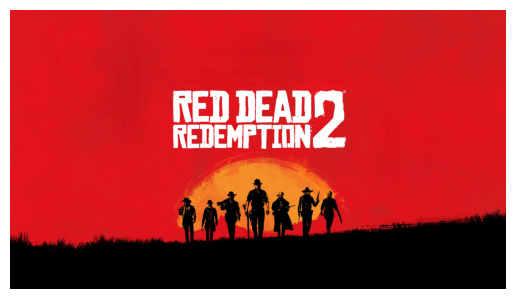

In [26]:
plt.axis("off")
plt.imshow(imgs[0])

# 2

In [42]:
with open("../../src/p2ch11/model.py", encoding="utf8") as f:
    text = f.read()
text

"import math\n\nfrom torch import nn as nn\n\nfrom util.logconf import logging\n\nlog = logging.getLogger(__name__)\n# log.setLevel(logging.WARN)\n# log.setLevel(logging.INFO)\nlog.setLevel(logging.DEBUG)\n\n\nclass LunaModel(nn.Module):\n    def __init__(self, in_channels=1, conv_channels=8):\n        super().__init__()\n\n        self.tail_batchnorm = nn.BatchNorm3d(1)\n\n        self.block1 = LunaBlock(in_channels, conv_channels)\n        self.block2 = LunaBlock(conv_channels, conv_channels * 2)\n        self.block3 = LunaBlock(conv_channels * 2, conv_channels * 4)\n        self.block4 = LunaBlock(conv_channels * 4, conv_channels * 8)\n\n        self.head_linear = nn.Linear(1152, 2)\n        self.head_softmax = nn.Softmax(dim=1)\n\n        self._init_weights()\n\n    # see also https://github.com/pytorch/pytorch/issues/18182\n    def _init_weights(self):\n        for m in self.modules():\n            if type(m) in {\n                nn.Linear,\n                nn.Conv3d,\n          

In [43]:
lines = text.split("\n")
len(lines)

89

In [46]:
line = lines[6]
line

'log = logging.getLogger(__name__)'

In [47]:
import re

In [48]:
punctuation = re.compile(r"[^a-zA-Z0-9_]+")
line = punctuation.sub(" ", line)
line

'log logging getLogger __name__ '

In [49]:
word_list = line.split(" ")
len(word_list), word_list

(5, ['log', 'logging', 'getLogger', '__name__', ''])

In [ ]:
text = punctuation.sub(" ", text)

In [62]:
text

'import math from torch import nn as nn from util logconf import logging log logging getLogger __name__ log setLevel logging WARN log setLevel logging INFO log setLevel logging DEBUG class LunaModel nn Module def __init__ self in_channels 1 conv_channels 8 super __init__ self tail_batchnorm nn BatchNorm3d 1 self block1 LunaBlock in_channels conv_channels self block2 LunaBlock conv_channels conv_channels 2 self block3 LunaBlock conv_channels 2 conv_channels 4 self block4 LunaBlock conv_channels 4 conv_channels 8 self head_linear nn Linear 1152 2 self head_softmax nn Softmax dim 1 self _init_weights see also https github com pytorch pytorch issues 18182 def _init_weights self for m in self modules if type m in nn Linear nn Conv3d nn Conv2d nn ConvTranspose2d nn ConvTranspose3d nn init kaiming_normal_ m weight data a 0 mode fan_out nonlinearity relu if m bias is not None fan_in fan_out nn init _calculate_fan_in_and_fan_out m weight data bound 1 math sqrt fan_out nn init normal_ m bias bou

In [66]:
word_list = text.split()

In [64]:
s = "a b c "
s.split(" ")

['a', 'b', 'c', '']

In [67]:
len(word_list), word_list

(272,
 ['import',
  'math',
  'from',
  'torch',
  'import',
  'nn',
  'as',
  'nn',
  'from',
  'util',
  'logconf',
  'import',
  'logging',
  'log',
  'logging',
  'getLogger',
  '__name__',
  'log',
  'setLevel',
  'logging',
  'WARN',
  'log',
  'setLevel',
  'logging',
  'INFO',
  'log',
  'setLevel',
  'logging',
  'DEBUG',
  'class',
  'LunaModel',
  'nn',
  'Module',
  'def',
  '__init__',
  'self',
  'in_channels',
  '1',
  'conv_channels',
  '8',
  'super',
  '__init__',
  'self',
  'tail_batchnorm',
  'nn',
  'BatchNorm3d',
  '1',
  'self',
  'block1',
  'LunaBlock',
  'in_channels',
  'conv_channels',
  'self',
  'block2',
  'LunaBlock',
  'conv_channels',
  'conv_channels',
  '2',
  'self',
  'block3',
  'LunaBlock',
  'conv_channels',
  '2',
  'conv_channels',
  '4',
  'self',
  'block4',
  'LunaBlock',
  'conv_channels',
  '4',
  'conv_channels',
  '8',
  'self',
  'head_linear',
  'nn',
  'Linear',
  '1152',
  '2',
  'self',
  'head_softmax',
  'nn',
  'Softmax',
  'di

In [68]:
word_list_unique = sorted(set(word_list))

In [69]:
len(word_list_unique[0])

1

In [61]:
blank_str = ""
blank_str, blank_str.isspace()

('', False)

In [70]:
words2index_dict = {word: idx for (idx, word) in enumerate(word_list_unique)}
len(words2index_dict), words2index_dict

(101,
 {'0': 0,
  '1': 1,
  '1152': 2,
  '18182': 3,
  '2': 4,
  '3': 5,
  '4': 6,
  '8': 7,
  'BatchNorm3d': 8,
  'Conv2d': 9,
  'Conv3d': 10,
  'ConvTranspose2d': 11,
  'ConvTranspose3d': 12,
  'DEBUG': 13,
  'INFO': 14,
  'Linear': 15,
  'LunaBlock': 16,
  'LunaModel': 17,
  'MaxPool3d': 18,
  'Module': 19,
  'None': 20,
  'ReLU': 21,
  'Softmax': 22,
  'True': 23,
  'WARN': 24,
  '__init__': 25,
  '__name__': 26,
  '_calculate_fan_in_and_fan_out': 27,
  '_init_weights': 28,
  'a': 29,
  'also': 30,
  'as': 31,
  'bias': 32,
  'block1': 33,
  'block2': 34,
  'block3': 35,
  'block4': 36,
  'block_out': 37,
  'bn_output': 38,
  'bound': 39,
  'class': 40,
  'com': 41,
  'conv1': 42,
  'conv2': 43,
  'conv_channels': 44,
  'conv_flat': 45,
  'data': 46,
  'def': 47,
  'dim': 48,
  'fan_in': 49,
  'fan_out': 50,
  'for': 51,
  'forward': 52,
  'from': 53,
  'getLogger': 54,
  'github': 55,
  'head_linear': 56,
  'head_softmax': 57,
  'https': 58,
  'if': 59,
  'import': 60,
  'in': 61,

In [71]:
word_onehot = torch.zeros(len(word_list), len(words2index_dict))
word_onehot.shape

torch.Size([272, 101])

In [72]:
word_index = [words2index_dict[word] for word in word_list]
word_index_t = torch.tensor(word_index).to(torch.int64).unsqueeze(1)
word_index_t.shape

torch.Size([272, 1])

In [73]:
word_onehot.scatter_(1, word_index_t, 1)
word_onehot

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])